In [3]:
#DATA ENGINEERING
#IMPORT LIBS
from pandas.io.json import json_normalize
import json
import pandas as pd
import numpy as np
import datetime
from datetime import date
import calendar

In [2]:
data = pd.read_json('News_Category_Dataset.json', lines=True)

In [1]:
idx=list(np.arange(1,200854))
date_list=list(data['date'])
author_list=list(data['authors'])
category_list=list(data['category'])
headline_list=list(data['headline'])
link_list=list(data['link'])
short_list=list(data['short_description'])

In [ ]:
day=[]
weekday=[]
month_list=[]
year_list=[]

for i in date_list:
    d_name=calendar.day_name[i.weekday()]
    weekday.append(d_name)
    datee = datetime.datetime.strptime(str(i), "%Y-%m-%d %H:%M:%S")

    m=datee.month
    month_list.append(m)
    y=datee.year
    year_list.append(y)
    d=datee.day
    day.append(d)

clean_data=pd.DataFrame({'SERIAL_NUMBER':idx,'DATE':date_list,'YEAR':year_list,'MONTH':month_list,'DAY':day,'DAY_OF_WEEK':weekday,'AUTHOR':author_list,'CATEGORY':category_list,'HEADLINE':headline_list,'LINK':link_list,'SHORT_DESC':short_list})

In [ ]:
clean_data.to_csv('master_data.csv',sep=',',header=True,index=False)

In [2]:
#DATA ANALYSIS
#IMPORT LIBS
import re
import pandas as pd # CSV file I/O (pd.read_csv)
from nltk.corpus import stopwords
import numpy as np
import sklearn
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
master_data = pd.read_csv("master_data.csv")
master_data['AUTHOR'] = master_data['AUTHOR'].fillna('None')
#print(news)
#[	SERIAL_NUMBER	DATE	YEAR	MONTH	DAY	DAY_OF_WEEK	AUTHOR	CATEGORY	HEADLINE	LINK	SHORT_DESC]



In [4]:
def data_slicer(start_date,end_date):
    index = pd.date_range(start=start_date,end=end_date)
    date_list=[]
    for ch in index:
        datee = datetime.datetime.strptime(str(ch), "%Y-%m-%d %H:%M:%S")
        datee2=datee.strftime("%d-%m-%Y")
        date_list.append(datee2)
    data_req=master_data[master_data['DATE'].isin(date_list)]
    return data_req

print(data_slicer('26-06-2012','31-12-2012'))

        Unnamed: 0  SERIAL_NUMBER        DATE  YEAR  MONTH  DAY DAY_OF_WEEK  \
169498      169498         169499  31-12-2012  2012     12   31      Monday   
169499      169499         169500  31-12-2012  2012     12   31      Monday   
169500      169500         169501  31-12-2012  2012     12   31      Monday   
169501      169501         169502  31-12-2012  2012     12   31      Monday   
169502      169502         169503  31-12-2012  2012     12   31      Monday   
169503      169503         169504  31-12-2012  2012     12   31      Monday   
169504      169504         169505  31-12-2012  2012     12   31      Monday   
169505      169505         169506  31-12-2012  2012     12   31      Monday   
169506      169506         169507  31-12-2012  2012     12   31      Monday   
169507      169507         169508  31-12-2012  2012     12   31      Monday   
169508      169508         169509  31-12-2012  2012     12   31      Monday   
169509      169509         169510  31-12-2012  2012 

In [5]:
def month_data(month_number):
    data_req=master_data[master_data['MONTH'] == month_number]
    return data_req
print(month_data(6))

        Unnamed: 0  SERIAL_NUMBER        DATE  YEAR  MONTH  DAY DAY_OF_WEEK  \
22555        22555          22556  30-06-2017  2017      6   30      Friday   
22556        22556          22557  30-06-2017  2017      6   30      Friday   
22557        22557          22558  30-06-2017  2017      6   30      Friday   
22558        22558          22559  30-06-2017  2017      6   30      Friday   
22559        22559          22560  30-06-2017  2017      6   30      Friday   
22560        22560          22561  30-06-2017  2017      6   30      Friday   
22561        22561          22562  30-06-2017  2017      6   30      Friday   
22562        22562          22563  30-06-2017  2017      6   30      Friday   
22563        22563          22564  30-06-2017  2017      6   30      Friday   
22564        22564          22565  30-06-2017  2017      6   30      Friday   
22565        22565          22566  30-06-2017  2017      6   30      Friday   
22566        22566          22567  30-06-2017  2017 

In [6]:
def day_of_week(day_name):
    data_req=master_data[master_data['DAY_OF_WEEK'] == day_name]
    return data_req

print(day_of_week('Monday'))

        Unnamed: 0  SERIAL_NUMBER        DATE  YEAR  MONTH  DAY DAY_OF_WEEK  \
276            276            277  21-05-2018  2018      5   21      Monday   
277            277            278  21-05-2018  2018      5   21      Monday   
278            278            279  21-05-2018  2018      5   21      Monday   
279            279            280  21-05-2018  2018      5   21      Monday   
280            280            281  21-05-2018  2018      5   21      Monday   
281            281            282  21-05-2018  2018      5   21      Monday   
282            282            283  21-05-2018  2018      5   21      Monday   
283            283            284  21-05-2018  2018      5   21      Monday   
284            284            285  21-05-2018  2018      5   21      Monday   
285            285            286  21-05-2018  2018      5   21      Monday   
286            286            287  21-05-2018  2018      5   21      Monday   
287            287            288  21-05-2018  2018 

In [12]:
def data_author(author_name):
    #data_req=master_data[master_data['AUTHOR'] == author_name]
    data_req=master_data[master_data.AUTHOR.str.contains(author_name)]
    return data_req

print(data_author('Ron'))

        Unnamed: 0  SERIAL_NUMBER        DATE  YEAR  MONTH  DAY DAY_OF_WEEK  \
2                2              3  26-05-2018  2018      5   26    Saturday   
3                3              4  26-05-2018  2018      5   26    Saturday   
4                4              5  26-05-2018  2018      5   26    Saturday   
5                5              6  26-05-2018  2018      5   26    Saturday   
6                6              7  26-05-2018  2018      5   26    Saturday   
38              38             39  25-05-2018  2018      5   25      Friday   
41              41             42  25-05-2018  2018      5   25      Friday   
49              49             50  25-05-2018  2018      5   25      Friday   
51              51             52  25-05-2018  2018      5   25      Friday   
80              80             81  24-05-2018  2018      5   24    Thursday   
83              83             84  24-05-2018  2018      5   24    Thursday   
106            106            107  24-05-2018  2018 

In [13]:
def date_to_date_analysis(start_date,end_date):
    data=data_slicer(start_date,end_date)
    category_count={}
    author_article_count={}
    year_list=list(set(list(data['YEAR'])))
    category_list=list(set(list(data['CATEGORY'])))
    authors_list=list(set(list(data['AUTHOR'])))
    print("\nThe active year/s in the given range :",year_list)
    print("\nThe categories published :",category_list)
    print("\nThe number of active authors :",len(authors_list))
    for cat in category_list:
        data1=data[data['CATEGORY']==cat]
        category_count[cat] = data1['CATEGORY'].count()
    print(category_count)
    
    for cat in authors_list:
        data1=data[data['AUTHOR']==cat]
        author_article_count[cat] = data1['AUTHOR'].count()
    #print(author_article_count)
    
    high_auth=[]
    highest_count=0
    highest_name='AA'
    for name,count in author_article_count.items():
        if count>highest_count:
            highest_count=count
            highest_name=name
        if count > 200:
            high_auth.append(name)
    print("\nAuthors who wrote more than 200 posts:",high_auth)
    print("\nMost Active Author in the given date range :",highest_name,highest_count)

date_to_date_analysis('26-05-2016','29-06-2017')


The active year/s in the given range : [2016, 2017]

The categories published : ['SCIENCE', 'PARENTS', 'ARTS & CULTURE', 'WORLD NEWS', 'MEDIA', 'RELIGION', 'WOMEN', 'ARTS', 'IMPACT', 'TASTE', 'POLITICS', 'COLLEGE', 'BUSINESS', 'TECH', 'SPORTS', 'TRAVEL', 'WORLDPOST', 'ENTERTAINMENT', 'CRIME', 'LATINO VOICES', 'GREEN', 'GOOD NEWS', 'HEALTHY LIVING', 'EDUCATION', 'FIFTY', 'WEIRD NEWS', 'BLACK VOICES', 'THE WORLDPOST', 'QUEER VOICES', 'STYLE', 'COMEDY']

The number of active authors : 6110
{'SCIENCE': 200, 'PARENTS': 1167, 'ARTS & CULTURE': 836, 'WORLD NEWS': 404, 'MEDIA': 599, 'RELIGION': 483, 'WOMEN': 956, 'ARTS': 52, 'IMPACT': 402, 'TASTE': 546, 'POLITICS': 11713, 'COLLEGE': 117, 'BUSINESS': 702, 'TECH': 277, 'SPORTS': 970, 'TRAVEL': 403, 'WORLDPOST': 151, 'ENTERTAINMENT': 3685, 'CRIME': 722, 'LATINO VOICES': 372, 'GREEN': 550, 'GOOD NEWS': 328, 'HEALTHY LIVING': 1458, 'EDUCATION': 173, 'FIFTY': 99, 'WEIRD NEWS': 739, 'BLACK VOICES': 1187, 'THE WORLDPOST': 2575, 'QUEER VOICES': 1478, 

In [14]:
master_data.groupby(by='CATEGORY').size()


CATEGORY
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          2579
dtype: 

In [10]:
#count the number of author in the dataset
#news.authors.value_counts()
total_authors = master_data.AUTHOR.nunique()
news_counts = master_data.shape[0]
print('Total Number of authors : ', total_authors)
print('avg articles written by per author: ' + str(news_counts//total_authors))
print('Total news counts : ' + str(news_counts))

Total Number of authors :  27993
avg articles written by per author: 7
Total news counts : 200853


In [11]:
authors_news_counts = master_data.AUTHOR.value_counts()
sum_contribution = 0
author_count = 0
for author_contribution in authors_news_counts:
    author_count += 1
    if author_contribution < 80:
        break
    sum_contribution += author_contribution
print('{} of news is contributed by {} authors i.e  {} % of news is contributed by {} % of authors'.
      format(sum_contribution, author_count, format((sum_contribution*100/news_counts), '.2f'), format((author_count*100/total_authors), '.2f')))

116604 of news is contributed by 259 authors i.e  58.05 % of news is contributed by 0.93 % of authors


In [15]:
master_data.AUTHOR.value_counts()[0:10]

None                 36620
Lee Moran             2423
Ron Dicker            1913
Reuters, Reuters      1562
Ed Mazza              1322
Cole Delbyck          1140
Andy McDonald         1068
Julia Brucculieri     1059
Carly Ledbetter       1054
Curtis M. Wong        1020
Name: AUTHOR, dtype: int64

In [16]:
author_name = 'Lee Moran'
#author_name = 'Ed Mazza'
particular_author_news = master_data[master_data['AUTHOR'] == author_name]
df = particular_author_news.groupby(by='CATEGORY')['HEADLINE'].count()
df

CATEGORY
ARTS & CULTURE     41
BLACK VOICES       29
BUSINESS            2
COMEDY            779
CRIME              92
EDUCATION           1
ENTERTAINMENT     387
GOOD NEWS          74
GREEN               2
IMPACT             12
LATINO VOICES       6
MEDIA              46
PARENTS            41
POLITICS          263
QUEER VOICES        6
RELIGION            7
SCIENCE            46
SPORTS            101
STYLE               3
TASTE              12
TECH               18
THE WORLDPOST      25
TRAVEL              4
WEIRD NEWS        390
WOMEN              25
WORLD NEWS         11
Name: HEADLINE, dtype: int64

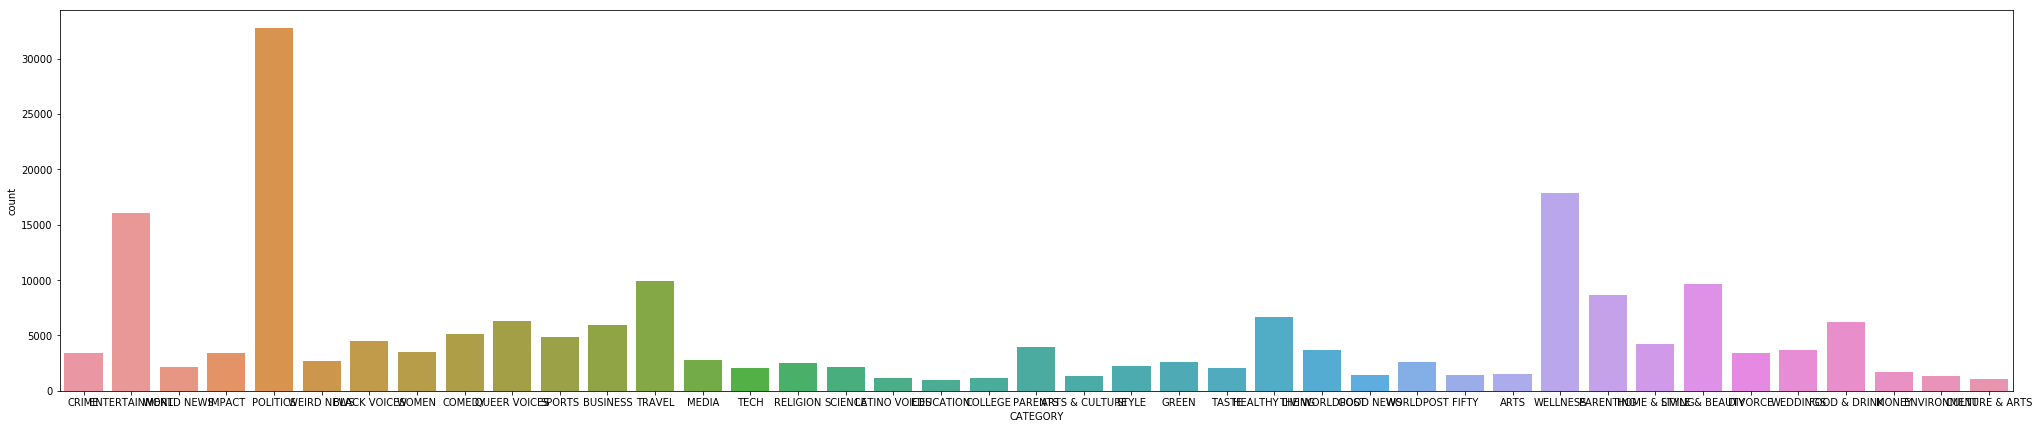

In [13]:
#DATA VISUALIZATION
fig, ax = plt.subplots(1, 1, figsize=(35,7))
sns.countplot(x = 'CATEGORY', data = master_data)

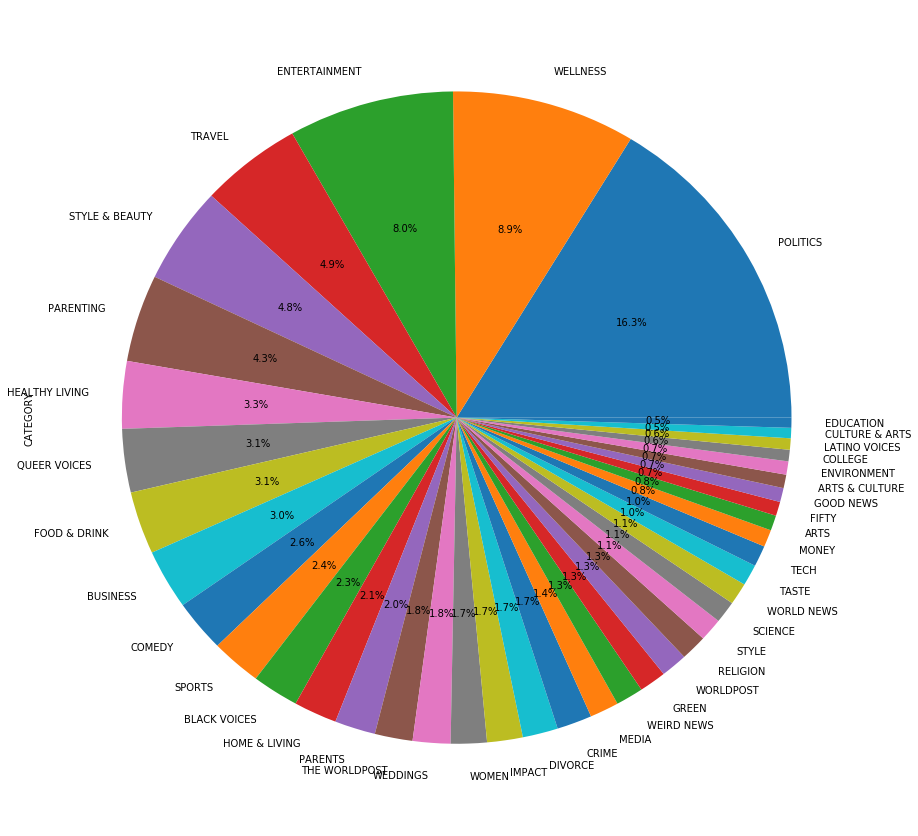

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
master_data['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')

In [17]:
data_2012=data_slicer('26-06-2012','31-12-2012')
data_2013=data_slicer('01-01-2013','31-12-2013')
data_2014=data_slicer('01-06-2014','31-12-2014')
data_2015=data_slicer('01-06-2015','31-12-2015')
data_2016=data_slicer('01-06-2016','31-12-2016')
data_2017=data_slicer('01-06-2017','31-12-2017')
data_2018=data_slicer('01-06-2018','26-05-2018')

Top 5 authors in 2012 
 None                5048
Reuters, Reuters     414
Michelle Manetti     269
Rebecca Adams        203
Michelle Persad      197
Amy Marturana        182
Name: AUTHOR, dtype: int64


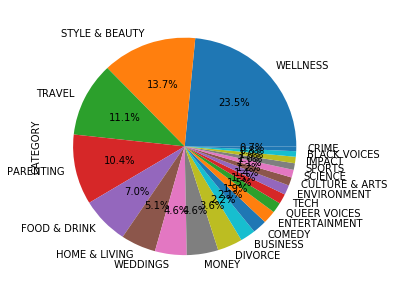

In [18]:
#2012
fig, ax = plt.subplots(1, 1, figsize=(5,5))
data_2012['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')
#MOST ACTIVE AUTHOR
x12=data_2012['AUTHOR'].value_counts()
print("Top 5 authors in 2012 \n",x12[:6])




Top 5 authors in 2013 
 None                11246
Reuters, Reuters      681
Michelle Manetti      555
Rebecca Adams         342
Dana Oliver           317
Michelle Persad       295
Name: AUTHOR, dtype: int64


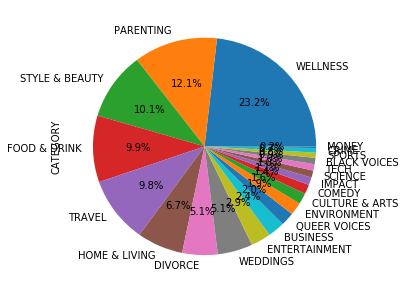

In [19]:

#2013
fig, ax = plt.subplots(1, 1, figsize=(5,5))
data_2013['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')
x13=data_2013['AUTHOR'].value_counts()
print("\nTop 5 authors in 2013 \n",x13[:6])




Top 5 authors in 2014 
 None                    4970
Dana Oliver              201
Chris Greenberg          181
Jamie Feldman            173
JamesMichael Nichols     173
Priscilla Frank          171
Name: AUTHOR, dtype: int64


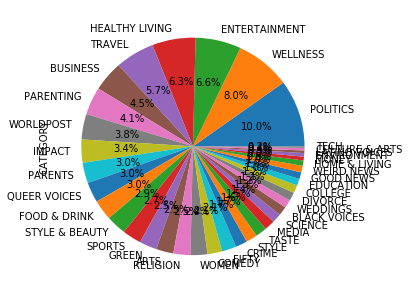

In [20]:
#2014
fig, ax = plt.subplots(1, 1, figsize=(5,5))
data_2014['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')
x14=data_2014['AUTHOR'].value_counts()
print("\nTop 5 authors in 2014 \n",x14[:6])




Top 5 authors in 2015 
 None                 4968
Bill Bradley          336
Lily Karlin           321
Julia Brucculieri     318
Ron Dicker            274
E. Oliver Whitney     256
Name: AUTHOR, dtype: int64


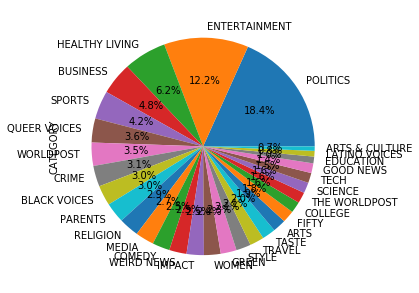

In [21]:
#2015
fig, ax = plt.subplots(1, 1, figsize=(5,5))
data_2015['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')
x15=data_2015['AUTHOR'].value_counts()
print("\nTop 5 authors in 2015 \n",x15[:6])



Top 5 authors in 2016 
 None                 4946
Lee Moran             811
Cole Delbyck          546
Julia Brucculieri     536
Ron Dicker            535
Carly Ledbetter       440
Name: AUTHOR, dtype: int64


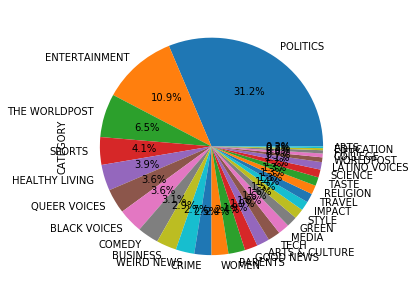

In [22]:
#2016
fig, ax = plt.subplots(1, 1, figsize=(5,5))
data_2016['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')
x16=data_2016['AUTHOR'].value_counts()
print("\nTop 5 authors in 2016 \n",x16[:6])




Top 5 authors in 2017 
 None                1172
Lee Moran            867
Mary Papenfuss       603
Ron Dicker           495
Ed Mazza             381
Caroline Bologna     337
Name: AUTHOR, dtype: int64


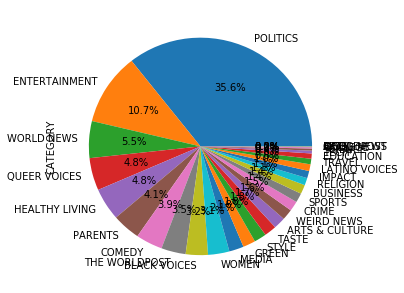

In [23]:
#2017
fig, ax = plt.subplots(1, 1, figsize=(5,5))
data_2017['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')
x17=data_2017['AUTHOR'].value_counts()
print("\nTop 5 authors in 2017 \n",x17[:6])



Top 5 authors in 2018 
 Lee Moran         610
Ed Mazza          402
Ron Dicker        375
Mary Papenfuss    301
Jenna Amatulli    266
Curtis M. Wong    243
Name: AUTHOR, dtype: int64


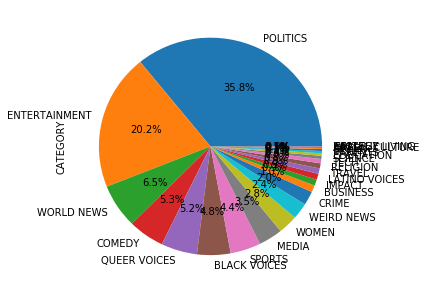

In [24]:
#2018
fig, ax = plt.subplots(1, 1, figsize=(5,5))
data_2018['CATEGORY'].value_counts().plot.pie( autopct = '%1.1f%%')

x18=data_2018['AUTHOR'].value_counts()
print("\nTop 5 authors in 2018 \n",x18[:6])

In [59]:
#MONTH WISE ANALYSIS
mon=month_data(1)
mon_split=mon['CATEGORY'].value_counts()
mon_split=list(mon_split.index)
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') & (mon['CATEGORY'] == 'WELLNESS') & (mon['CATEGORY'] == 'ENTERTAINMENT') & (mon['CATEGORY'] == 'PARENTING') & (mon['CATEGORY']=='TRAVEL')]
mon_split_1=mon[(mon['CATEGORY'] == 'BUSINESS') & (mon['CATEGORY'] == 'SPORTS') & (mon['CATEGORY'] == 'MEDIA') & (mon['CATEGORY'] == 'ENVIRONMENT') & (mon['CATEGORY']=='EDUCATION')]


Top 5 authors in JAN 
 None              3081
Lee Moran          265
Ron Dicker         203
Cole Delbyck       141
Mary Papenfuss     132
Ellie Krupnick     128
Name: AUTHOR, dtype: int64


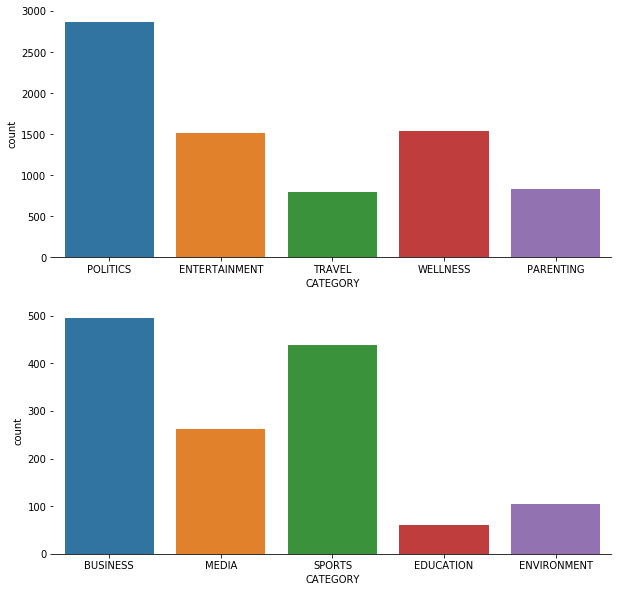

In [121]:
#Jan
mon=month_data(1)
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in JAN \n",x18[:6])
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in FEB 
 None                3098
Lee Moran            293
Ron Dicker           177
Reuters, Reuters     156
Dana Oliver          150
Ellie Krupnick       142
Name: AUTHOR, dtype: int64


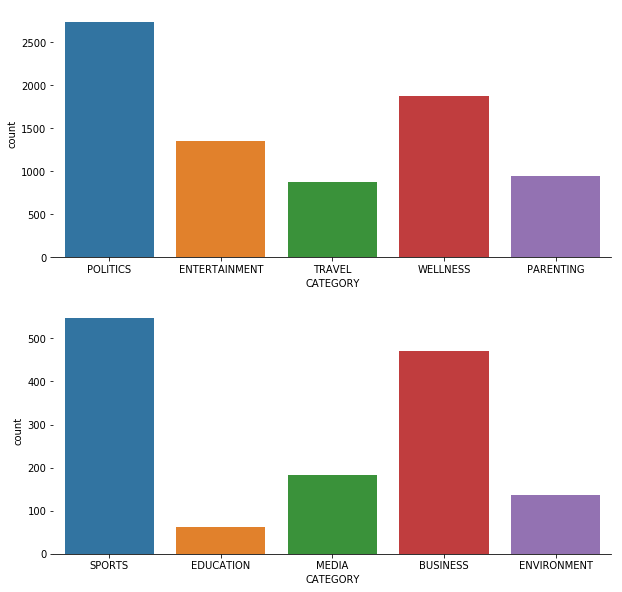

In [122]:
#FEB
mon=month_data(2)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in FEB \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in MAR 
 None                3428
Lee Moran            265
Ron Dicker           204
Reuters, Reuters     192
Ellie Krupnick       175
Ed Mazza             148
Name: AUTHOR, dtype: int64


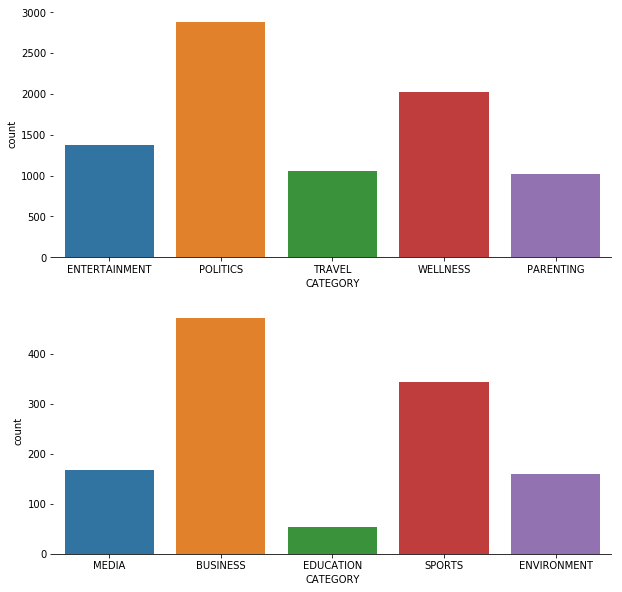

In [123]:
#MAR
mon=month_data(3)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in MAR \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in APR 
 None                3083
Lee Moran            223
Ron Dicker           186
Ed Mazza             162
Reuters, Reuters     156
Mary Papenfuss       143
Name: AUTHOR, dtype: int64


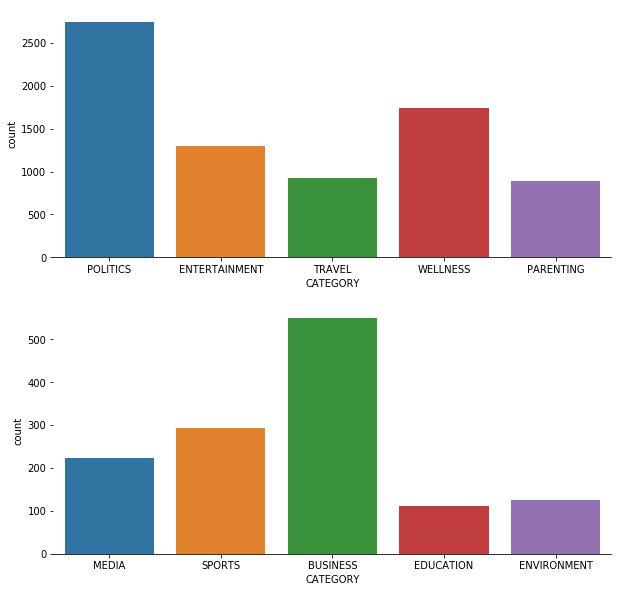

In [124]:
#APR
mon=month_data(4)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in APR \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in MAY 
 None                3295
Lee Moran            241
Ron Dicker           193
Ed Mazza             152
Mary Papenfuss       138
Reuters, Reuters     118
Name: AUTHOR, dtype: int64


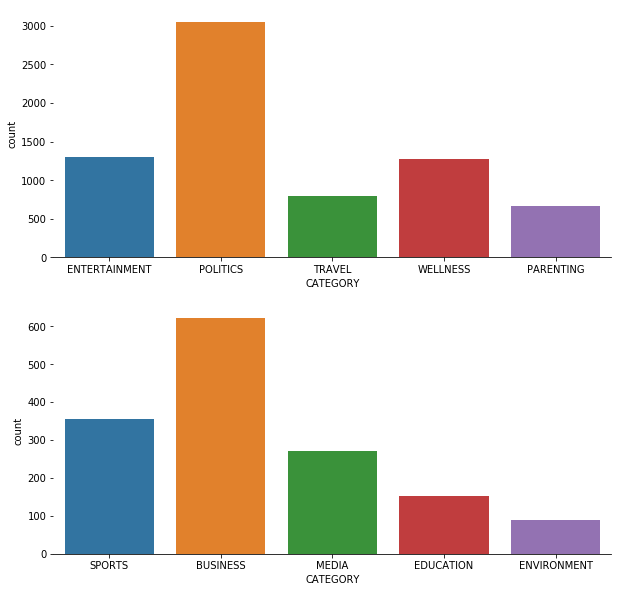

In [125]:
#MAY
mon=month_data(5)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in MAY \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in JUN 
 None                3125
Reuters, Reuters     128
Ron Dicker            90
Lee Moran             83
Rebecca Adams         77
Curtis M. Wong        71
Name: AUTHOR, dtype: int64


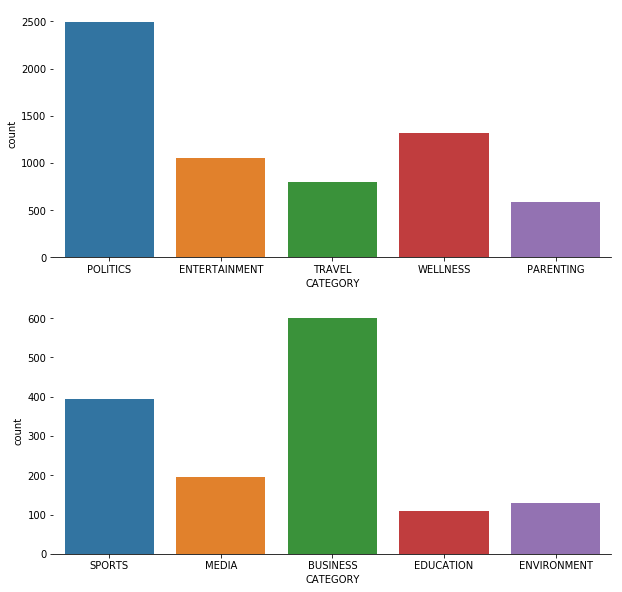

In [126]:
#JUN
mon=month_data(6)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in JUN \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])

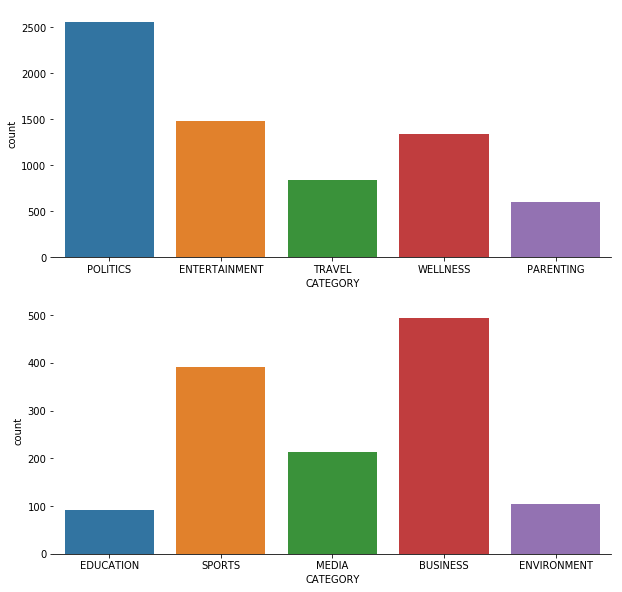

In [106]:
#JULY
mon=month_data(7)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in JULY \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in AUG 
 None                 3305
Ron Dicker            162
Julia Brucculieri     118
Lee Moran             109
Michelle Manetti      108
Ed Mazza              108
Name: AUTHOR, dtype: int64


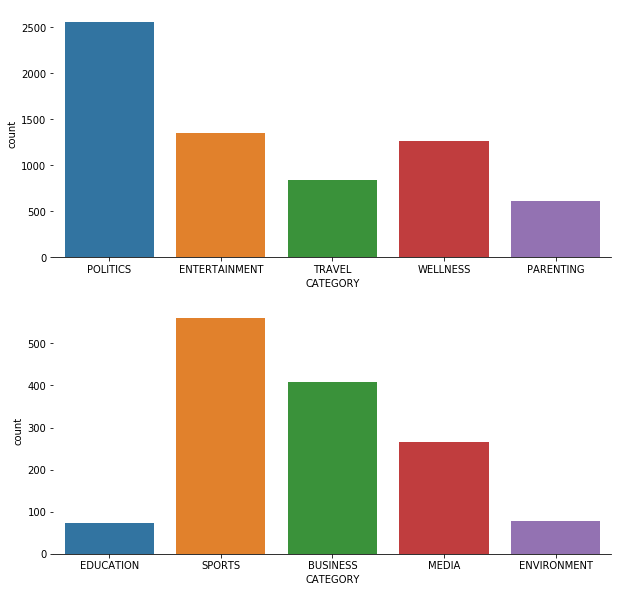

In [127]:
#AUG
mon=month_data(8)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in AUG \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in SEP 
 None                 2906
Ron Dicker            162
Reuters, Reuters      125
Lee Moran             115
Bill Bradley          105
Julia Brucculieri     101
Name: AUTHOR, dtype: int64


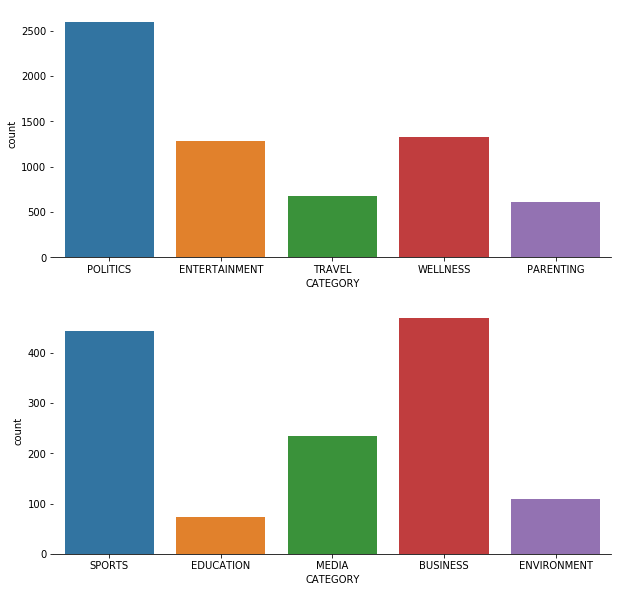

In [128]:
#SEP
mon=month_data(9)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in SEP \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in OCT 
 None                 2914
Lee Moran             174
Ron Dicker            164
Reuters, Reuters      112
Julia Brucculieri     106
Bill Bradley          103
Name: AUTHOR, dtype: int64


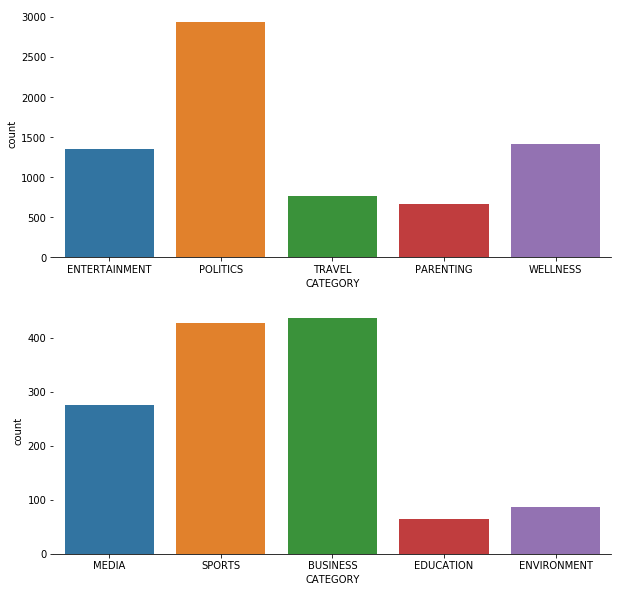

In [129]:
#OCT
mon=month_data(10)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in OCT \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in NOV 
 None                 2728
Lee Moran             257
Ron Dicker            150
Cole Delbyck          133
Reuters, Reuters      115
Julia Brucculieri     101
Name: AUTHOR, dtype: int64


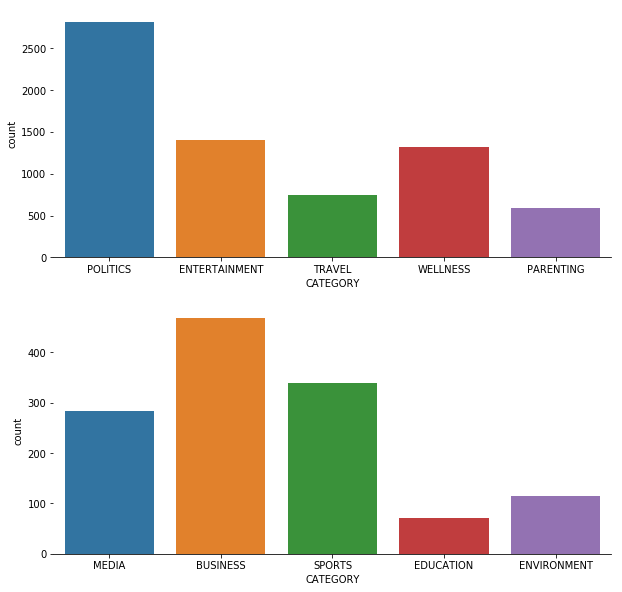

In [130]:
#NOV
mon=month_data(11)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in NOV \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])


Top 5 authors in DEC 
 None               2643
Lee Moran           254
Ron Dicker          137
Mary Papenfuss      130
Ellie Krupnick      119
Carly Ledbetter     116
Name: AUTHOR, dtype: int64


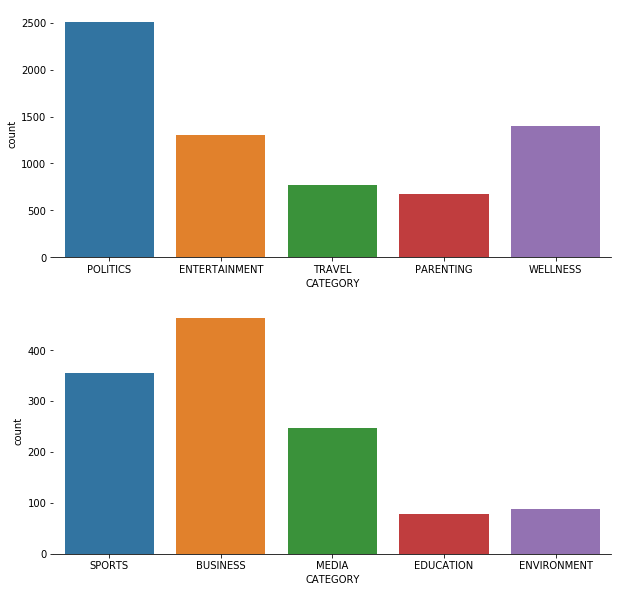

In [131]:
#DEC
mon=month_data(12)
x18=mon['AUTHOR'].value_counts()
print("\nTop 5 authors in DEC \n",x18[:6])
mon_split_1=mon[(mon['CATEGORY'] == 'POLITICS') | (mon['CATEGORY'] == 'WELLNESS') | (mon['CATEGORY'] == 'ENTERTAINMENT') | (mon['CATEGORY'] == 'PARENTING') | (mon['CATEGORY']=='TRAVEL')]
mon_split_2=mon[(mon['CATEGORY'] == 'BUSINESS') | (mon['CATEGORY'] == 'SPORTS') | (mon['CATEGORY'] == 'MEDIA') | (mon['CATEGORY'] == 'ENVIRONMENT') | (mon['CATEGORY']=='EDUCATION')]
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.despine(left=True)
sns.countplot(x = 'CATEGORY', data = mon_split_1,ax=axes[0])
sns.countplot(x = 'CATEGORY', data = mon_split_2,ax=axes[1])

In [134]:
mon_data=day_of_week('Monday')
tue_data=day_of_week('Tuesday')
wed_data=day_of_week('Wednesday')
thu_data=day_of_week('Thurday')
fri_data=day_of_week('Friday')
sat_data=day_of_week('Saturday')
sun_data=day_of_week('Sunday')

weekday_data = pd.concat([mon_data,tue_data,wed_data,thu_data])
weekend_data = pd.concat([fri_data,sat_data,sun_data])

In [145]:
x18=weekday_data['AUTHOR'].value_counts()
print("\nTop 5 authors on Weekdays \n",x18[:6])
print("\nLeast popular 5 authors on Weekdays \n",x18.tail(5))


Top 5 authors on Weekdays 
 None               15208
Ron Dicker          1060
Ed Mazza             796
Lee Moran            787
Carly Ledbetter      657
Andy McDonald        574
Name: AUTHOR, dtype: int64

Least popular 5 authors on Weekdays 
 Barry Wilner & Tom Canavan, AP                                                                   1
Cooper Koch, Contributor\r\nHusband to Todd, Dad to Claire & Mason, Founder of Cooper Smit...    1
Peyton Price and Stephanie Sprenger, Contributors                                                1
Carine Fabius, ContributorAuthor, art dealer, museum curator and temporary body art pioneer      1
Aaron Anson, Contributor\r\nInspirational self-help speaker and author, 'Mind Your Own Lif...    1
Name: AUTHOR, dtype: int64


In [146]:
x18=weekend_data['AUTHOR'].value_counts()
print("\nTop 5 authors on Weekends \n",x18[:6])
print("\nLeast popular 5 authors on Weekends \n",x18.tail(5))


Top 5 authors on Weekends 
 None                16223
Lee Moran            1339
Reuters, Reuters      848
Mary Papenfuss        650
Ron Dicker            496
Bill Bradley          480
Name: AUTHOR, dtype: int64

Least popular 5 authors on Weekends 
 Martin J. Bernstein, Contributor\r\nWriter, hiker and nature enthusiast                          1
Tom Schraeder, Contributor\r\nMusician/Blogger                                                   1
Carla Herreria and Ryan J. Reilly                                                                1
Taina Bien-Aime, ContributorExecutive Director, Coalition Against Trafficking in Women (CATW)    1
George Clooney, Contributor                                                                      1
Name: AUTHOR, dtype: int64


In [143]:
x18=weekday_data['CATEGORY'].value_counts()
print("\nTop 5 categories on Weekdays \n",x18[:6])
print("\nLeast 5 categories on Weekdays \n",x18.tail(5))


Top 5 categories on Weekdays 
 POLITICS          15019
WELLNESS           9413
ENTERTAINMENT      6405
STYLE & BEAUTY     5146
TRAVEL             5071
PARENTING          4792
Name: CATEGORY, dtype: int64

Least 5 categories on Weekdays 
 COLLEGE           553
FIFTY             512
EDUCATION         469
ENVIRONMENT        74
CULTURE & ARTS     42
Name: CATEGORY, dtype: int64


In [142]:
x18=weekend_data['CATEGORY'].value_counts()
print("\nTop 5 categories on Weekends \n",x18[:6])
print("\nLeast 5 categories on Weekends \n",x18.tail(5))


Top 5 categories on Weekends 
 POLITICS         12533
ENTERTAINMENT     7562
WELLNESS          5303
QUEER VOICES      3319
BUSINESS          3201
TRAVEL            3098
Name: CATEGORY, dtype: int64

Least 5 categories on Weekends 
 COLLEGE           410
EDUCATION         403
LATINO VOICES     363
MONEY             362
ARTS & CULTURE    336
Name: CATEGORY, dtype: int64


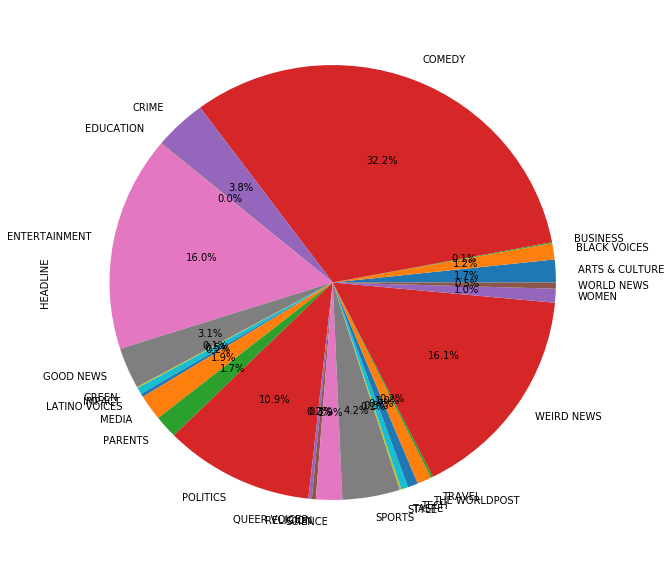

In [26]:
#AUTHOR PLOT LEE  MORGAN
fig, ax = plt.subplots(1, 1, figsize=(10,10))
df.plot.pie( autopct = '%1.1f%%')

In [43]:
import pandas as pd
from sklearn import model_selection, preprocessing, linear_model, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import decomposition, ensemble
#from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
x=data_slicer('26-05-2016','29-06-2018')
trainDF = pd.DataFrame()
trainDF['label']=x['CATEGORY']
trainDF['text']=x['HEADLINE']

# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# create a count vectorizer object 
'''count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.fit_transform(train_x.values.astype('U'))
xvalid_count =  count_vect.fit_transform(valid_x.values.astype('U'))'''

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

RF, Count Vectors:  0.5156044564390008


In [44]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(xtrain_count,train_y)
Y_predict = model.predict(xvalid_count)
accuracy = accuracy_score(valid_y,Y_predict)*100
print(format(accuracy, '.2f'))

58.63


In [38]:
logistic_Regression = LogisticRegression()
logistic_Regression.fit(xtrain_count,train_y)
Y_predict = logistic_Regression.predict(xvalid_count)
accuracy = accuracy_score(valid_y,Y_predict)*100
print(format(accuracy, '.2f'))

62.98
